In [1]:
include("../../modules/SearchInsertion/_util.jl")
include("../../modules/SearchInsertion/_types.jl")
include("../../modules/SearchInsertion/intersection.jl")
include("../../modules/SearchInsertion/inside.jl")
include("../../modules/SearchInsertion/extremal.jl")
include("../../modules/SearchInsertion/moving.jl")
import Plots

# Segment to segment intersection

Este algoritmo fue uno de lo más sencillos de implementar y de entender dado que no presenta mayor complejidad que la de los pequeños detalles.
Podemos ver que la función retorna un código y una intersección

parallel


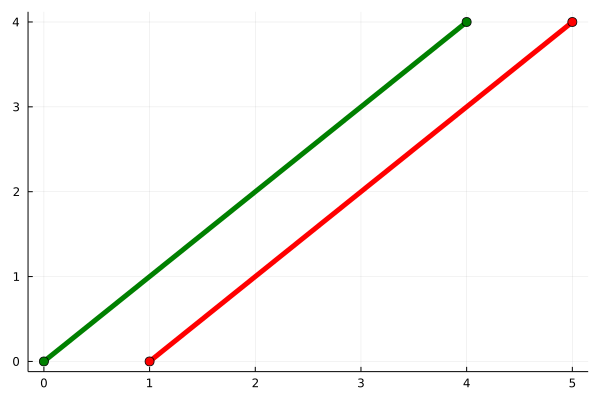

In [2]:
s1 = Segment([0,0],[4,4])
s2 = Segment([1,0],[5,4])
code, inter = find_intersect(s1,s2)
println(code)
if inter != nothing
    plot(Vertex(inter),color=:yellow)
end
plot(s1,color=:green)
plot!(s2,color=:red)

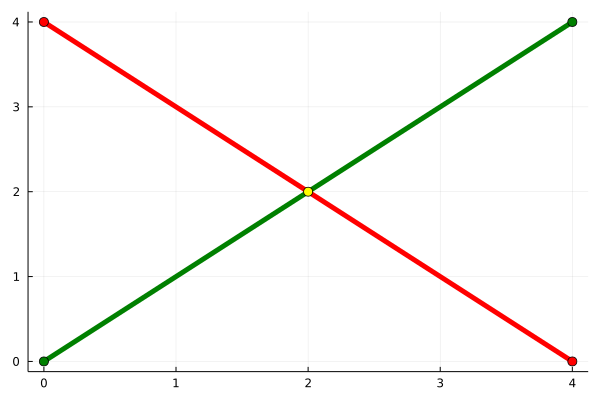

In [3]:
s1 = Segment([0,0],[4,4])
s2 = Segment([0,4],[4,0])
code, inter = find_intersect(s1,s2)
plot(s1,color=:green)
plot!(s2,color=:red)
plot!(Vertex(inter),color=:yellow)

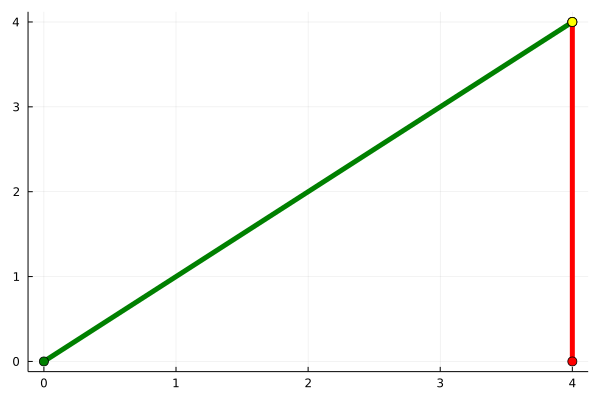

In [4]:
s1 = Segment([0,0],[4,4])
s2 = Segment([4,4],[4,0])
code, inter = find_intersect(s1,s2)
plot(s1,color=:green)
plot!(s2,color=:red)
plot!(Vertex(inter),color=:yellow)

# Polygon intersection

En este algoritmo se computa la intersección de dos poligonos y se retorna como un nuevo polígono en caso de existir. De forma similar al algoritmo anterior, la implementación no tuvo ninguna dificultad pues el libro fue claro en el procedimiento.

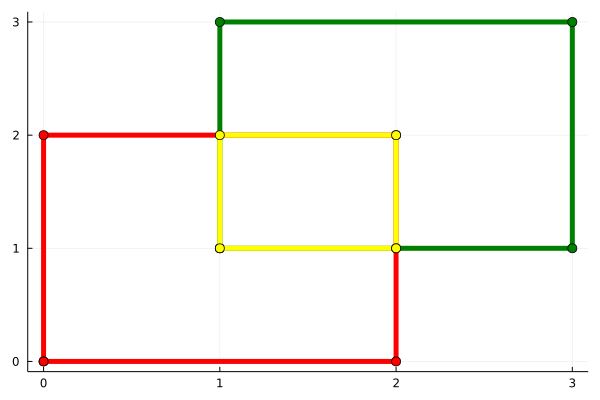

In [5]:
p = Polygon([0,0],[2,0],[2,2],[0,2])
q = Polygon([1,1],[3,1],[3,3],[1,3])
pq = find_intersect(p,q)
plot(p,color=:red)
plot!(q,color=:green)
plot!(pq,color=:yellow)

# Segments intersection

Este algoritmo fue uno de los más desafiantes de comprender e interpretar pero con un grado de dificultad suficiente para ser un reto y para lograr un gran aprendizaje. El algoritmo busca evitar hacer las $n^2$ comparaciones que sucederían si lo hicieramos de una forma greedy, haciendo uso del barrido del plano a lo largo del eje \textit{y} mientras guarda los segmentos de recta de forma ordenada sobre el eje \textit{x}. Por ello se toman en cuenta tres clases de eventos.
+ Entrada de segmentos
+ Salida de segmentos
+ Intersección de segmentos
para mantener un orden en los eventos y en los segmentos que entran a la lista se hace uso de AVLTree o árboles binarios autobalanceados que mantienen un orden a la vez que evitan que el árbol se propague en una rama exclusivamente.

En la entrada de elementos se busca si hay intersecciones con el anterior y con el sucesor en cuyo caso se agregan a la pila de eventos manejada por AVLTree.

En la salida de elementos simplemente se elimina el elemento de la lista y se comparan los elementos que se encuentran a sus lados en caso de existir.

En el caso de intersecciones hay que tener mucho cuidado puesto que al realizar una intersección, se cambian de lado los elementos que se encuentra adjuntos y se vuelven a computar intersecciones con los nuevos adyacentes. Si no se maneja de forma correcta este caso terminará en un bucle infinito. Si en las nuevas intersecciones computadas hay una que se haya calculado previamente y no la notamos esto evitará el fin del ciclo principal por lo cuál la debemos ignorar.

Este algoritmo fue el que más me gusto realizar debido principalmente a la elegancia de su solución sin demeritar la dificultad de su implementación.

In [6]:
segs = [Segment(rand(2)*50,rand(2)*50) for _ in 1:50]
intersections = find_intersects(segs...)

123-element Vector{Vector{Float64}}:
 [5.638809406574225, 48.707651473121885]
 [14.401742462164048, 47.8283367761022]
 [14.862045933754922, 47.35707757477891]
 [23.947155094013645, 47.23170190559854]
 [28.458780267677618, 46.949703315797564]
 [32.687759628060604, 46.68537146862043]
 [24.748590178606793, 45.90937442170892]
 [27.660375004715284, 45.4829969161398]
 [31.640875404722607, 45.42794630423321]
 [31.249184416103514, 44.957481572055904]
 [39.085763080324874, 44.928171131045815]
 [32.64191996946115, 38.991267197168575]
 [24.5328348444299, 37.5538462712736]
 ⋮
 [39.35801156254746, 16.59112995489155]
 [37.289910304263884, 10.498547536317947]
 [11.875147205694196, 24.687270459298382]
 [8.607518214838471, 9.976573144881819]
 [11.52197393375063, 15.996156032021586]
 [11.738530433622154, 7.208672342764585]
 [11.875147205694196, 24.687270459298382]
 [11.142529931877966, 6.658554630672857]
 [8.607518214838471, 9.97657314488182]
 [11.871030247238103, 1.832061843100395]
 [25.417160554449957

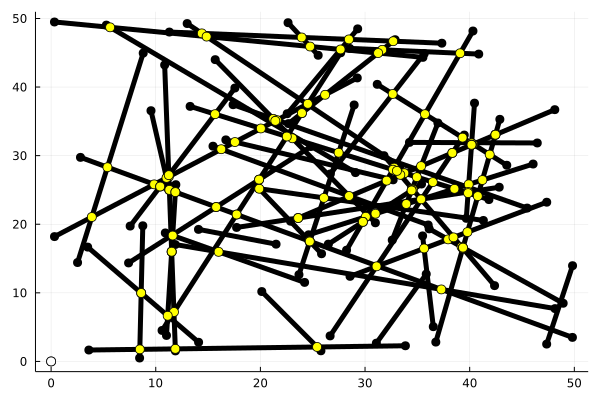

In [7]:
plot(Vertex([0,0]),color=:white)
for seg in segs
    plot!(seg,color=:black)
end
for inter in intersections
    plot!(Vertex(inter),color=:yellow)
end
plot!(Vertex([0,0]),color=:white)

# Point inside polygon

Este algoritmo es interesante dado que propone una solución elegante para determinar si un punto está o no dentro de un polígono, no hubo mayor complicación.

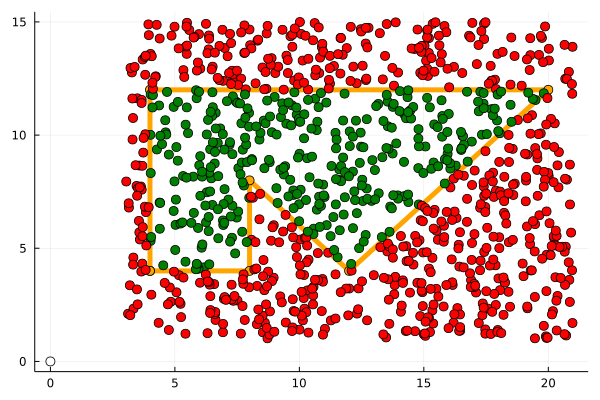

In [8]:
pol = Polygon([4,4],[8,4],[8,8],[12,4],[20,12],[4,12])
plot(pol,color=:orange)
for p in 1:1000
    p = [(rand()*18)+3,(rand()*14)+1]
    code = isinside(p,pol)
    if code == "inside"
        color = :green
    elseif code == "vertex"
        color = :yellow
    elseif code == "edge"
        color = :blue
    elseif code == "outside"
        color = :red
    end
    plot!(Vertex(p),color=color)
end
plot!(Vertex([0,0]),color=:white)

# Point inside polyhedron

Este algoritmo determina si un punto dado esta contenido en un polihedro. La solución es la misma que la dada por el algoritmo anterior con la diferencia de que tiene más casos especiales, mismos que se tratan de una forma general. 
El ejemplo presentado muestra un tetrahedro en el origen y varios puntos fácilmente demostrables que están dentro o fuera del polihedro. En general este algoritmo fue simple de implementar con ayuda de algoritmo que computa la intersección entre un triángulo en $R^3$ y un segmento de recta.

In [9]:
v1 = [0,0,0]
v2 = [1,0,0]
v3 = [0,1,0]
v4 = [0,0,1]
hedron = Polyhedron((v1,v2,v3,v4),[1,2,3],[1,2,4],[1,3,4],[2,3,4])
points = [[0,0,0],
    [0,0.5,0],
    [-1,-1,-1],
    [0.25,0.25,0.25],
    [0.3,0.3,0.3]]
f = (p,hed) -> isinside(p,hed)
for p in points
    is_in = isinside(p,hedron)
    println("$p is $is_in")
end

[0.0, 0.0, 0.0] is first_vertex
[0.0, 0.5, 0.0] is first_edge
[-1.0, -1.0, -1.0] is outside
[0.25, 0.25, 0.25] is inside
[0.3, 0.3, 0.3] is inside


# Extremal in direction

Este algoritmo computa el vértice cuya componente de un vector $\vec{u}$ es mayor. En general fue muy explicativo el libro con la implementación y fue sencillo. Cabe resaltar la forma en la que termina el ciclo el algoritmo, con ayuda de un artificio muy sutíl. 

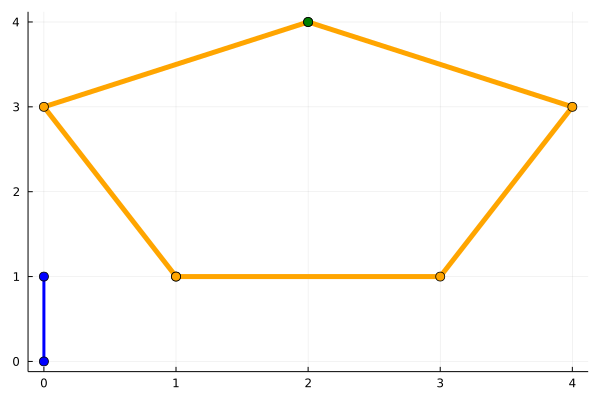

In [10]:
pol = Polygon([1,1],[3,1],[4,3],[2,4],[0,3])
u = [0,1]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

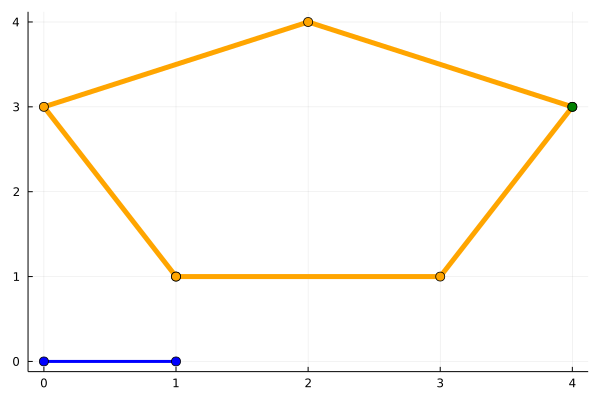

In [11]:
pol = Polygon([1,1],[3,1],[4,3],[2,4],[0,3])
u = [1,0]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

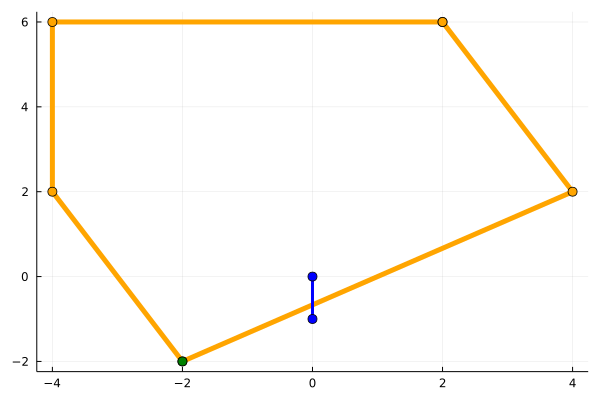

In [12]:
pol = Polygon([2,6],[-4,6],[-4,2],[-2,-2],[4,2])
u = [0,-1]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

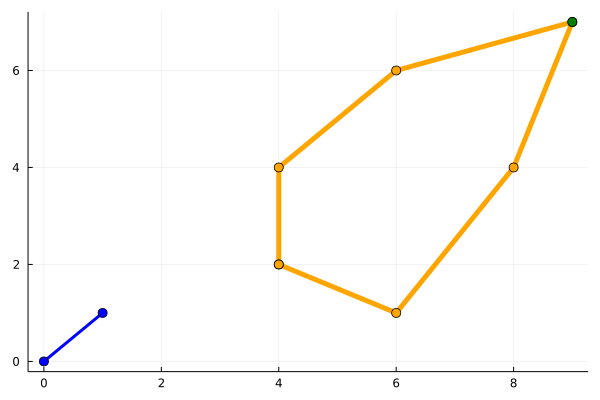

In [13]:
pol = Polygon([4,2],[6,1],[8,4],[9,7],[6,6],[4,4])
u = [1,1]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

# Shortest single vertex

El algoritmo computa el camino más corto que debe seguir una particula, dado un conjunto de obstáculos disjuntos. El problema puede parecer en un inicio complicado, pero se puede reducir a realizar dos labores

+ Crear el grafo de visibilidad
+ Encontrar el camino más corto desde un punto origen hasta el destino

Lo primero se puede realizar simplemente buscando por pares de vértices los nodos y arista de nuestro gráfico de visibiidad, descartando aquellos elementos en el mismo polígono que no sean adyacentes y aquellos que no sean visibles, es decir que choquen con alguna arista de los polígonos. 
El segundo punto se puede implementar con el algoritmo Dijkstra.
Una vez comprendido el algoritmo no fue complicado de implementar.

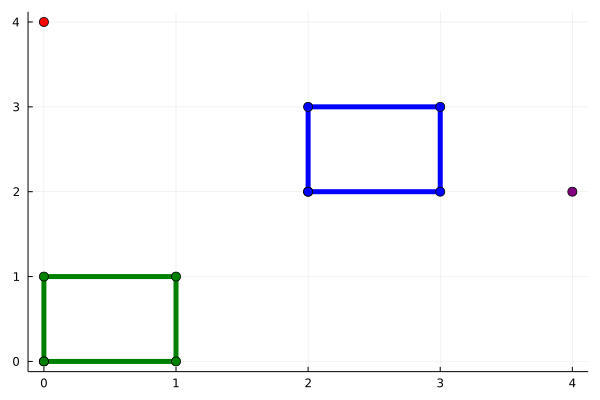

In [14]:
p1 = Polygon([0,0],[1,0],[1,1],[0,1])
p2 = Polygon([2,2],[3,2],[3,3],[2,3])
origin = Vertex([0,4])
dest = Vertex([4,2])
visg = get_visibility_graph(origin,dest,[p1,p2])
plot(p1,color=:green)
plot!(p2,color=:blue)
plot!(origin,color=:red)
plot!(dest,color=:purple)

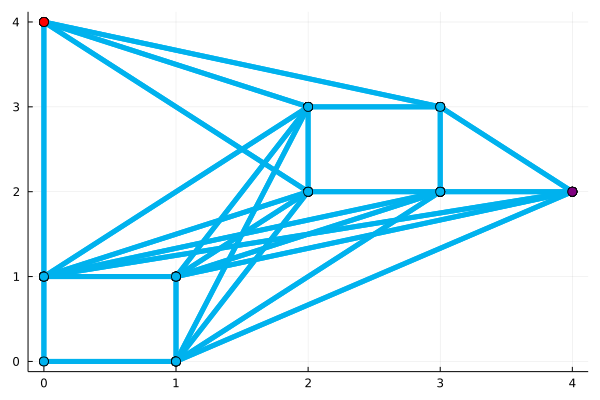

In [15]:
plot(visg,color=:deepskyblue2)
plot!(origin,color=:red)
plot!(dest,color=:purple)

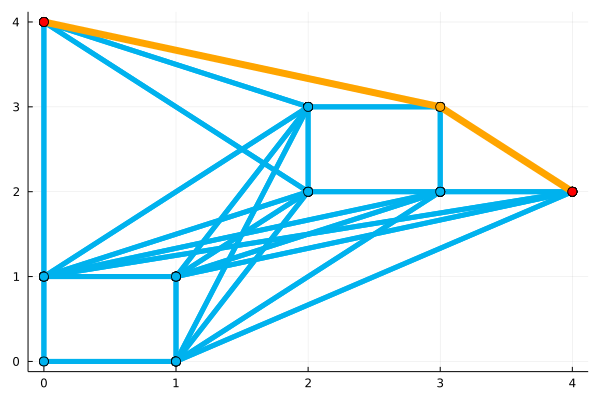

In [16]:
path = dijkstra(visg,origin,dest)
x,y = [v[1] for v in path],[v[2] for v in path]
plot(visg,color=:deepskyblue2)
Plots.plot!(x,y,marker=(:circle,5,:orange),linecolor=:orange, linewidth=7, legend=false)
plot!(origin,color=:red)
plot!(dest,color=:red)

# Moving Polygon

Este es un caso especial del algoritmo anterior donde se debe realizar un preprocesamiento a los polígonos antes de buscar el camino más corto. Primero se debe realizar la suma de Minkowski sobre todos los polígonos obstáculos, tras lo cuál obtenemos elementos más grandes y que incluso pueden llegar a solaparse, por lo cuál se debe calcular la union de los elementos polígonos, pues de lo contrario el algoritmo puede fallar y encontrar una solución no factible, por donde no pasa el polígono.
Esta fue una complicación ya que no se pudo encontrar la forma directa de computar la unión de dichos elementos ya que el libro no da una descripción precisa y el algoritmo parece tener muchos casos especiales que deben ser tratados de forma particular.
Después de realizar el procesamiento, el procedimiento es el mismo que el algoritmo anterior.

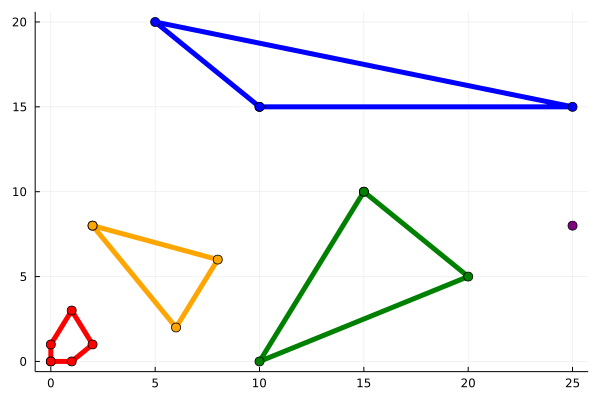

In [17]:
p0 = Polygon([0,0],[1,0],[2,1],[1,3],[0,1])
p1 = Polygon(-[0,0],-[1,0],-[2,1],-[1,3],-[0,1])

obs1 = Polygon([2,8],[6,2],[8,6])
obs2 = Polygon([15,10],[10,0],[20,5])
obs3 = Polygon([10,15],[25,15],[5,20])

origin = Vertex([0,0])
dest = Vertex([25,8])
obs = [obs1,obs2,obs3]

colors = [:orange,:green,:blue]

plot(p0,color=:red)
for (o,c) in zip(obs,colors)
    plot!(o,color=c)
end
plot!(dest,color=:purple)

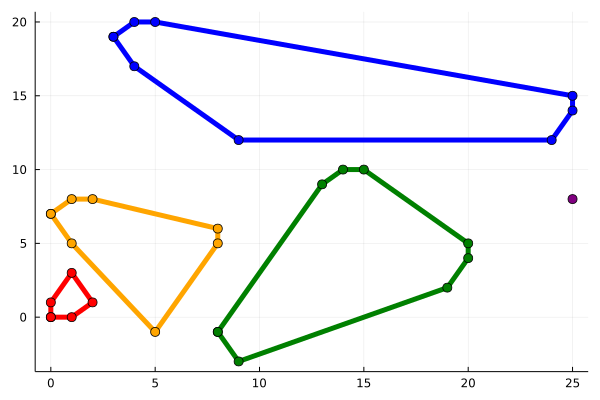

In [18]:
obs_hulls = [minkowski_sum(o,p1) for o in obs]
plot(p0,color=:red)
for (h,c) in zip(obs_hulls,colors)
    plot!(h,color=c)
end
plot!(dest,color=:purple)

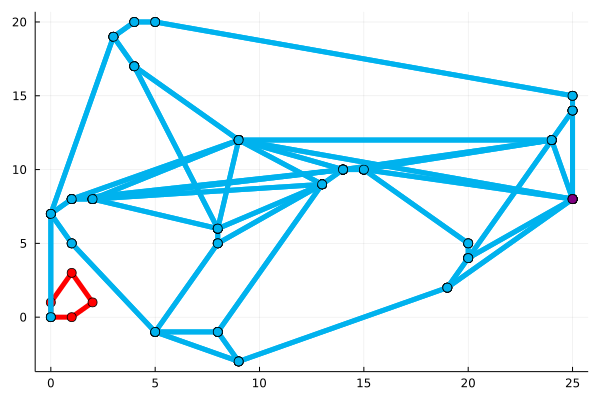

In [19]:
visg = get_visibility_graph(origin,dest,obs_hulls)
plot(p0,color=:red)
plot!(visg,color=:deepskyblue2)
plot!(dest,color=:purple)

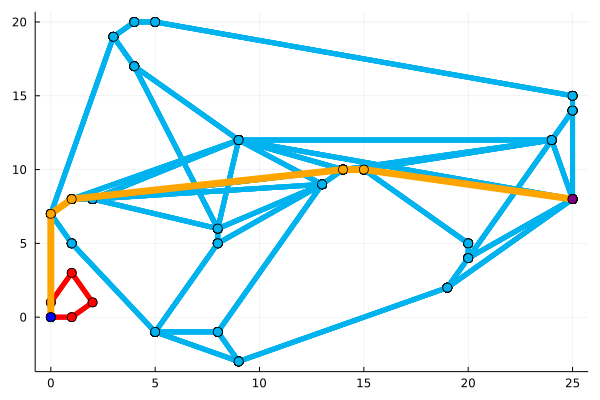

In [20]:
path = dijkstra(visg,origin,dest)
x,y = [v[1] for v in path],[v[2] for v in path]
plot!(p0,color=:red)
plot!(visg,color=:deepskyblue2)
Plots.plot!(x,y,marker=(:circle,5,:orange),linecolor=:orange, linewidth=7, legend=false)
plot!(origin,color=:blue)
plot!(dest,color=:purple)